# Telecom Customer Churn Prediction
This project addresses a Classification problem aimed at predicting customer Churn (customer attrition) based on customer data.

##  Project Steps:
1. Import Library
2. Load Data
3. EDA
4. Preprocessing (Encoding , Scaling , Imputation)
5. Visulization
6. Training the model
7. Evaluation

# 1. Import necessary libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


# 2. Load data

In [49]:
# Load and display the dataset
df = pd.read_csv('IT_customer_churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. EDA

In [50]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [52]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [53]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 4. PreProcessing

In [54]:
# Helper function to display unique values for each column in the DataFrame
def print_unique(df) :
    for column in df:
        print(f"{column} :{df[column].unique()}")

In [55]:
print_unique(df)

gender :['Female' 'Male']
SeniorCitizen :[0 1]
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

### Data Cleaning

In [56]:
# convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True) # drop NaN

df.replace(['No phone service', 'No internet service'], 'No', inplace=True)

In [57]:
print_unique(df)

gender :['Female' 'Male']
SeniorCitizen :[0 1]
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :['No' 'Yes']


### Encodeing

In [58]:
# Encode categorical variables: gender to binary, Yes/No to 1/0, and create dummy variables for categorical features
df['gender'].replace({'Male': 1 , 'Female':0} , inplace=True)
for col in df:
    df[col].replace({'Yes':1 , 'No':0} , inplace=True)
    
df =pd.get_dummies(df ,  ['InternetService' , 'Contract','PaymentMethod'])

In [59]:
print_unique(df)

gender :[0 1]
SeniorCitizen :[0 1]
Partner :[1 0]
Dependents :[0 1]
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :[0 1]
MultipleLines :[0 1]
OnlineSecurity :[0 1]
OnlineBackup :[1 0]
DeviceProtection :[0 1]
TechSupport :[0 1]
StreamingTV :[0 1]
StreamingMovies :[0 1]
PaperlessBilling :[1 0]
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :[0 1]
InternetService_0 :[False  True]
InternetService_DSL :[ True False]
InternetService_Fiber optic :[False  True]
Contract_Month-to-month :[ True False]
Contract_One year :[False  True]
Contract_Two year :[False  True]
PaymentMethod_Bank transfer (automatic) :[False  True]
PaymentMethod_Credit card (automatic) :[False  True]
PaymentMethod_Electronic check :[ True False]
Pay

### Scaling

In [60]:
# Normalize numerical features to 0-1 range using MinMaxScaler
cols_to_scale = ['tenure' , 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# 5. Visualization

In [61]:
tenure_churn_no = df[df['Churn'] == 0].tenure
tenure_churn_yes = df[df['Churn'] == 1].tenure

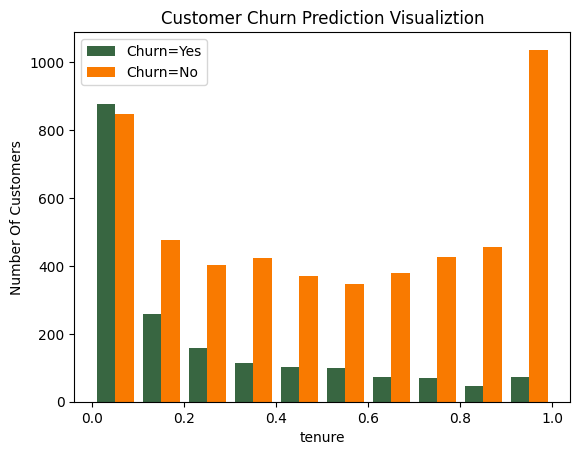

In [62]:
# Compare tenure distribution between churned vs. retained customers
plt.hist([tenure_churn_yes, tenure_churn_no],color=['#386641' , '#F97A00'],label=['Churn=Yes','Churn=No'])
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.legend()
plt.show()

In [63]:
MonthlyCharges_churn_no = df[df['Churn'] == 0].MonthlyCharges
MonthlyCharges_churn_yes = df[df['Churn'] == 1].MonthlyCharges

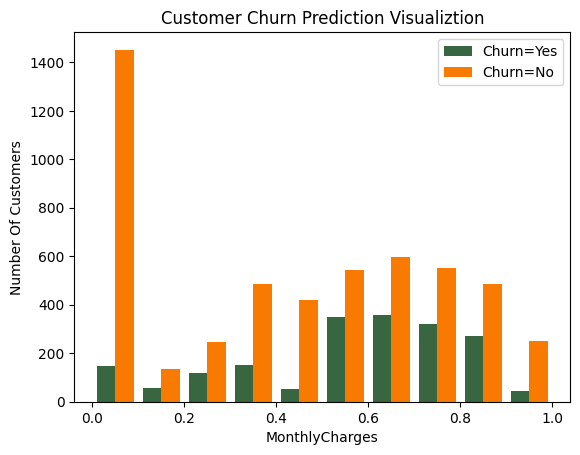

In [64]:
# Compare MonthlyCharges distribution between churned vs. retained customers
plt.hist([MonthlyCharges_churn_yes,MonthlyCharges_churn_no] ,color=['#386641' , '#F97A00'], label=['Churn=Yes','Churn=No'])
plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()
plt.show()

In [65]:
TotalCharges_churn_no = df[df['Churn'] == 0].TotalCharges
TotalCharges_churn_yes = df[df['Churn'] == 1].TotalCharges

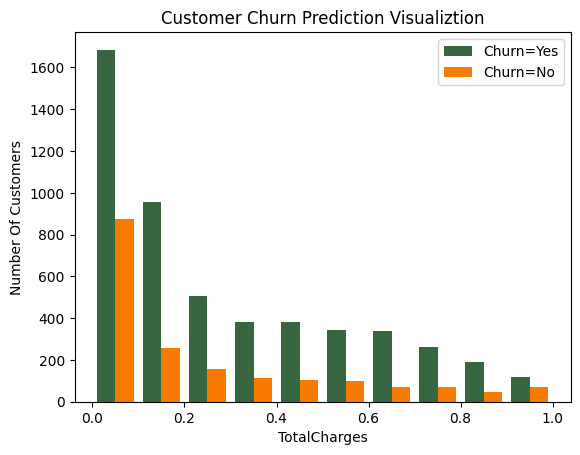

In [66]:
# Compare TotalCharges distribution between churned vs. retained customers
plt.hist([TotalCharges_churn_no , tenure_churn_yes], color=['#386641' , '#F97A00'], label=['Churn=Yes','Churn=No'])
plt.xlabel('TotalCharges')
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()
plt.show()

Train Test Split

In [67]:
x = df.drop(columns='Churn' , axis=1)
y = df['Churn']
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.2, random_state=15 , stratify=y)

In [68]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (5625, 26)
y_train shape: (5625,)
x_test shape: (1407, 26)
y_test shape: (1407,)


# 6&7. Train the model and Evaluation

In [69]:
# Train and evaluate Logistic Regression model with classification report
def log_reg(x_train , y_train , x_test , y_test):
    log = LogisticRegression()
    model = log.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test , y_pred))

In [70]:
log_reg(x_train,y_train , x_test , y_test)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



# "Handle Imbalanced dataset"

### method 1: Undersampling

In [71]:
count_class_0 , count_class_1 = df['Churn'].value_counts()
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]

In [72]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under_balanced = pd.concat([df_class_0_under , df_class_1])
print('Random under-sampling:')
print(df_under_balanced.Churn.value_counts())


Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [73]:
x = df_under_balanced.drop('Churn' , axis=1)
y = df_under_balanced['Churn']
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size=0.2 , random_state=15 , stratify=y)

In [75]:
log_reg(x_train , y_train , x_test ,y_test)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       374
           1       0.74      0.78      0.76       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



<p style="color: #2E8B57; font-size: 20px; font-weight: bold;"> After applying undersampling, the F1 score for minority class 1 improved from 0.59 to 0.75 </p>

### method 2: Oversampling

In [76]:
df_class_1_over = df_class_1.sample(count_class_0 , replace=True)
df_over_balanced = pd.concat([df_class_0 , df_class_1_over])
print('Random over-sampling:')
print(df_over_balanced.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [77]:
x = df_over_balanced.drop('Churn' , axis=1)
y = df_over_balanced['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [78]:
log_reg(x_train , y_train , x_test , y_test)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1033
           1       0.75      0.80      0.77      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.76      2066
weighted avg       0.77      0.77      0.76      2066



<p style="color: #2E8B57; font-size: 20px; font-weight: bold;"> After applying Oversampling, the F1 score for minority class 1 improved from 0.59 to 0.77 </p>

### method 3: SMOTE

In [79]:
x = df.drop('Churn',axis='columns')
y = df['Churn']

In [80]:
smote  = SMOTE(sampling_strategy='minority')
x_smote , y_smote = smote.fit_resample(x,y)

In [81]:
y_smote.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=15, stratify=y_smote)

In [83]:
log_reg(x_train , y_train , x_test , y_test)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1033
           1       0.78      0.84      0.81      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



<p style="color: #2E8B57; font-size: 20px; font-weight: bold;"> After applying SMOTE oversampling, the F1 score for minority class 1 improved from 0.59 to 0.81 </p>

### method 4: SMOTE + Tomek-link

In [84]:
from imblearn.combine import SMOTETomek

In [85]:
smt = SMOTETomek(sampling_strategy='auto')

In [86]:
x_smt , y_smt = smt.fit_resample(x,y)

In [87]:
y_smt.value_counts()

Churn
0    4870
1    4870
Name: count, dtype: int64

In [88]:
x_smt.shape

(9740, 26)

In [89]:
y_smt.shape

(9740,)

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x_smt, y_smt, test_size=0.2, random_state=15, stratify=y_smt)

In [91]:
log_reg(x_train , y_train , x_test , y_test)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       974
           1       0.80      0.85      0.82       974

    accuracy                           0.82      1948
   macro avg       0.82      0.82      0.82      1948
weighted avg       0.82      0.82      0.82      1948



<p style="color: #2E8B57; font-size: 20px; font-weight: bold;"> After applying SMOTE + Tomeklinks, the F1 score for minority class 1 improved from 0.59 to 0.82 </p>